# Flower Detector

In [50]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import random as rn

import cv2
from tqdm import tqdm
from random import shuffle
from zipfile import ZipFile
from PIL import Image

In [51]:
pwd

'/content'

In [52]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [53]:
my_data= '/content/drive/MyDrive/DL/flowers'
my_data

'/content/drive/MyDrive/DL/flowers'

In [54]:
os.listdir(my_data)

['daisy', 'tulip', 'sunflower', 'rose', 'dandelion', 'train', 'test']

In [55]:
X = []
Z = []
IMG_SIZE = 150
FLOWER_DAISY_DIR = my_data + '/daisy/'
FLOWER_SUNFLOWER_DIR = my_data + '/sunflower/'
FLOWER_TULIP_DIR = my_data + '/tulip/'
FLOWER_DANDI_DIR = my_data + '/dandelion/'
FLOWER_ROSE_DIR = my_data + '/rose/'
FLOWER_ROSE_DIR

'/content/drive/MyDrive/DL/flowers/rose/'

In [56]:
# Define the path to the main data folder containing the flower dataset
data_folder = '/content/drive/MyDrive/DL/flowers'

# Import necessary libraries
import os
import shutil

# Construct the path for the training and testing folders
train_folder = os.path.join(data_folder, 'train')  # Path to the training dataset
test_folder = os.path.join(data_folder, 'test')    # Path to the testing dataset

# Display the path to the training folder
train_folder

'/content/drive/MyDrive/DL/flowers/train'

In [57]:
# Create the training and testing folders if they do not already exist
os.makedirs(train_folder, exist_ok=True)  # Creates the training folder
os.makedirs(test_folder, exist_ok=True)    # Creates the testing folder

# Define the classes of flowers for the dataset
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']  # List of flower classes
classes  # Display the list of flower classes


['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [58]:
# Loop through each flower class to create corresponding folders for training and testing
for flower_class in classes:
    # Construct the path for the training folder of the current flower class
    train_class_folder = os.path.join(train_folder, flower_class)
    # Construct the path for the testing folder of the current flower class
    test_class_folder = os.path.join(test_folder, flower_class)

    # Create the training class folder if it does not already exist
    os.makedirs(train_class_folder, exist_ok=True)
    # Create the testing class folder if it does not already exist
    os.makedirs(test_class_folder, exist_ok=True)


## Randomly add images to train folders

In [59]:
import random  # Import the random library for shuffling the dataset

# Define the split ratio for the dataset (80% training, 20% testing)
split_ratio = 0.8  # 80% for training, 20% for testing

# Loop through each flower class to split the images into training and testing sets
for flower_class in classes:
    # List all images in the current flower class folder
    flower_images = os.listdir(os.path.join(data_folder, flower_class))
    # Shuffle the list of flower images randomly
    random.shuffle(flower_images)

    # Calculate the index to split the dataset based on the defined split ratio
    split_index = int(len(flower_images) * split_ratio)

    # Copy images for the training set (first 80% of shuffled images)
    for image in flower_images[:split_index]:
        # Define the source path of the image
        src = os.path.join(data_folder, flower_class, image)
        # Define the destination path in the training folder
        dest = os.path.join(train_folder, flower_class, image)
        # Copy the image from the source to the destination
        shutil.copy(src, dest)

    # Copy images for the testing set (remaining 20% of shuffled images)
    for image in flower_images[split_index:]:
        # Define the source path of the image
        src = os.path.join(data_folder, flower_class, image)
        # Define the destination path in the testing folder
        dest = os.path.join(test_folder, flower_class, image)
        # Copy the image from the source to the destination
        shutil.copy(src, dest)


In [60]:
train_path = my_data+'/train/'
test_path = my_data+'/test/'
print(os.listdir(train_path))
print(os.listdir(test_path))

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']
['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']


In [61]:
import os  # Import the os library for file and directory operations
import matplotlib.pyplot as plt  # Import matplotlib for data visualization

# Define the classes of flowers to analyze
classes = ['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

# Specify the directory containing the flower dataset
data_dir = '/content/drive/MyDrive/DL/flowers'

# Initialize a list to store the number of images for each class
total_counts = []
total = 0  # Initialize a variable to keep track of the total number of images

# Loop through each class name to count the number of images
for class_name in classes:
    # Construct the path to the current class directory
    class_dir = os.path.join(data_dir, class_name)
    # Count the number of .jpg files in the class directory
    num_images = len([fname for fname in os.listdir(class_dir) if fname.endswith('.jpg')])
    total_counts.append(num_images)  # Append the count to the total_counts list
    total += num_images  # Add to the total count
    print(class_dir)
    print('num of Imgs =', num_images)

print('TOTAL = ', total)
total_counts  # Display the counts of images for each class


/content/drive/MyDrive/DL/flowers/daisy
num of Imgs = 764
/content/drive/MyDrive/DL/flowers/dandelion
num of Imgs = 1052
/content/drive/MyDrive/DL/flowers/rose
num of Imgs = 794
/content/drive/MyDrive/DL/flowers/sunflower
num of Imgs = 733
/content/drive/MyDrive/DL/flowers/tulip
num of Imgs = 984
TOTAL =  4327


[764, 1052, 794, 733, 984]

In [62]:
import seaborn as sns  # Import the Seaborn library for data visualization
from skimage.io import imread  # Import the imread function to read images
import os  # Import the os library for file and directory operations

# Initialize empty lists to store image dimensions and class labels
x = []  # List to store the height of images
y = []  # List to store the width of images
hue = []  # List to store class names for hue in visualization

# Loop through each class name in the defined classes
for class_name in classes:
    # Construct the path to the directory of the current class in the training set
    class_dir = os.path.join(train_path, class_name)

    # Loop through each image file in the class directory
    for image_name in os.listdir(class_dir):
        # Process only .jpg files
        if image_name.endswith('.jpg'):
            # Read the image using imread
            img = imread(os.path.join(class_dir, image_name))
            # Get the dimensions of the image (height, width, number of color channels)
            d1, d2, colors = img.shape
            # Append the height and width to their respective lists
            x.append(d1)  # Height of the image
            y.append(d2)  # Width of the image
            # Append the class name to the hue list for visualization
            hue.append(class_name)


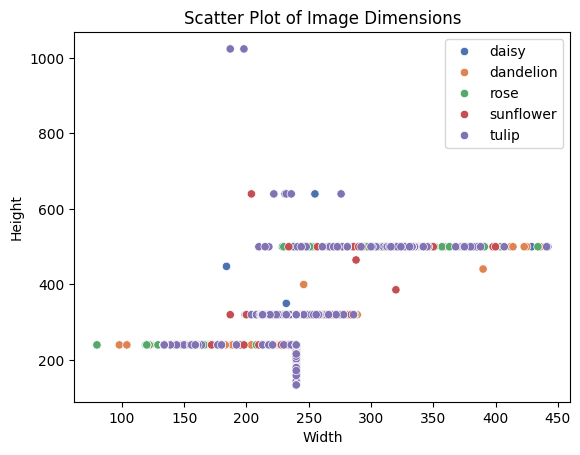

In [63]:
sns.scatterplot(x=x, y=y, hue=hue, palette="deep")
plt.xlabel('Width')
plt.ylabel('Height')
plt.title('Scatter Plot of Image Dimensions')
plt.show()

In [64]:
print(np.mean(x), np.mean(y))

253.31591562799616 338.6176893576222


In [65]:
path1=train_path+'/daisy'+"/1342002397_9503c97b49.jpg"
path1

'/content/drive/MyDrive/DL/flowers/train//daisy/1342002397_9503c97b49.jpg'

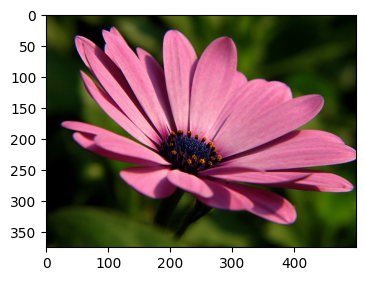

In [66]:
flower_img=imread(path1)
plt.figure(figsize=(4,5))
plt.imshow(flower_img);

In [67]:
path2=train_path+'/daisy'+"/5547758_eea9edfd54_n.jpg"
path2

'/content/drive/MyDrive/DL/flowers/train//daisy/5547758_eea9edfd54_n.jpg'

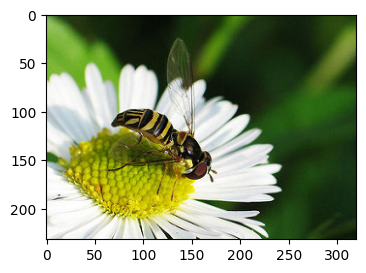

In [68]:
s_flower_img=imread(path2)
plt.figure(figsize=(4,5))
plt.imshow(s_flower_img);

In [69]:
s_img = imread(path2)

s_d1, s_d2, s_colors = s_img.shape
print(s_d1, s_d2, s_colors)

232 320 3


In [70]:
flower_img.max(), flower_img.min()

(255, 0)

In [71]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

flower_gen = ImageDataGenerator(rotation_range=20, # rotate the image 20 degrees
                               width_shift_range=0.10, # Shift the pic width by a max of 10%
                               height_shift_range=0.10, # Shift the pic height by a max of 10%
                               rescale=1/255, # Rescale the image by normalzing it.
                               shear_range=0.1, # Shear means cutting away part of the image (max 10%)
                               zoom_range=0.1, # Zoom in by 10% max
                               horizontal_flip=True, # Allowe horizontal flipping
                               fill_mode='nearest' # Fill in missing pixels with the nearest filled value
                              )
flower_gen

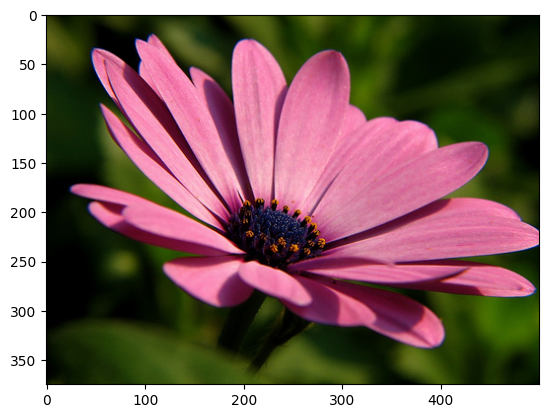

In [72]:
plt.imshow(flower_img)

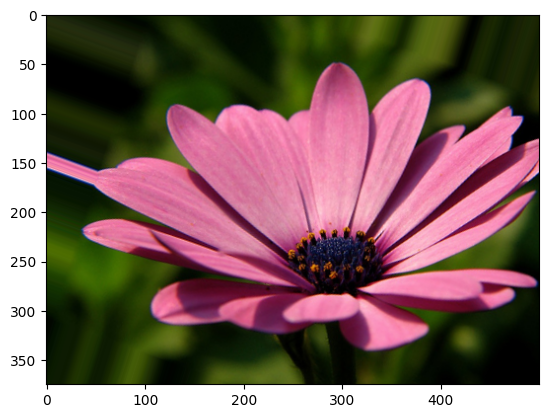

In [73]:
plt.imshow(flower_gen.random_transform(flower_img))

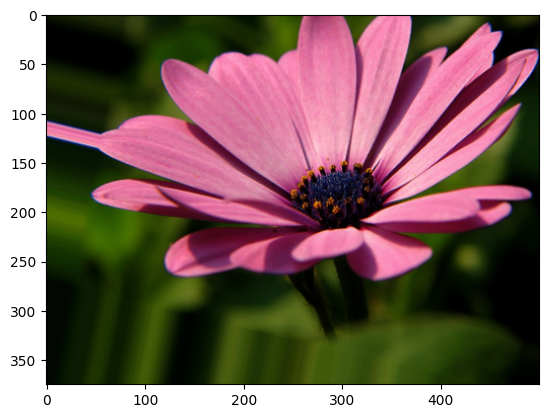

In [74]:
plt.imshow(flower_gen.random_transform(flower_img))

# Create The Model

In [75]:
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D, GlobalAveragePooling2D

In [76]:
from tensorflow.keras.layers import BatchNormalization

## Train Images

In [77]:
# Set the batch size for loading images
batch_size = 32

# Create a data generator for the training set using flow_from_directory
train_flower_gen = flower_gen.flow_from_directory(
    train_path,                # Path to the training data directory
    target_size=(224, 224),    # Resize images to 224x224 pixels
    color_mode='rgb',          # Specify color mode as RGB
    batch_size=batch_size,     # Set the number of images per batch
    class_mode='sparse',       # Use sparse categorical labels (integer labels)
    shuffle=True               # Shuffle the data at each epoch
)


Found 4172 images belonging to 5 classes.


## Test Images

In [78]:
flower_gen_test = ImageDataGenerator()

test_flower_gen = flower_gen_test.flow_from_directory(test_path,

                                                   target_size=(224,224),

                                                   color_mode='rgb',

                                                   batch_size=batch_size,

                                                   class_mode='sparse', shuffle=True)

Found 1579 images belonging to 5 classes.


# ResNet152

In [79]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Input
import tensorflow as tf

image_shape = (224, 224, 3)

# Create a Sequential model
resnet_model = Sequential()

# Add an Input layer
resnet_model.add(Input(shape=image_shape))

# Load the pre-trained ResNet152 model
pretrained_model = tf.keras.applications.ResNet152(include_top=False,
                                                   input_shape=image_shape,
                                                   pooling='avg',
                                                   weights="imagenet")

# Freeze the pre-trained model layers
for layer in pretrained_model.layers:
    layer.trainable = False

# Add the pre-trained ResNet model to the Sequential model
resnet_model.add(pretrained_model)

# Add dense layers
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(128, activation='relu'))
resnet_model.add(Dense(5, activation='softmax'))

# Compile the model
resnet_model.compile(loss='sparse_categorical_crossentropy',
                     optimizer='adam',
                     metrics=['accuracy'])

# Now the model summary should work
resnet_model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet152 (Functional)               │ (None, 2048)                │      58,370,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 512)                 │       1,049,088 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          65,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 59,486,341 (226.92 MB)

 Trainable params: 1,115,397 (4.25 MB)

 Non-trainable params: 58,370,944 (222.67 MB)

In [80]:
from tensorflow.keras.callbacks import EarlyStopping

In [81]:
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# restore_best_weights eğitimin erken durdurulması durumunda, modelin ağırlıkları,
# izlenen metriğin en iyi değerini verdiği anda kaydedilen ağırlıklarla değiştirilir.
# Loss degeri belirli bir noktadan sonra artmaya baslayip model durursa,
# bu parametre sayesinde loss degerinin en dusuk oldugu skorla degistirir.

In [82]:
history_resnet152 = resnet_model.fit(train_flower_gen,epochs=10,
                    validation_data=test_flower_gen,
                    callbacks=[early_stop])

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


131/131 ━━━━━━━━━━━━━━━━━━━━ 143s 864ms/step - accuracy: 0.2841 - loss: 1.6055 - val_accuracy: 0.1742 - val_loss: 4.6146
Epoch 2/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 110s 668ms/step - accuracy: 0.3532 - loss: 1.4838 - val_accuracy: 0.1887 - val_loss: 5.6449
Epoch 3/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 143s 676ms/step - accuracy: 0.3913 - loss: 1.4422 - val_accuracy: 0.1919 - val_loss: 5.6054
Epoch 4/10
131/131 ━━━━━━━━━━━━━━━━━━━━ 88s 648ms/step - accuracy: 0.3988 - loss: 1.4415 - val_accuracy: 0.1957 - val_loss: 6.3265


# Performance

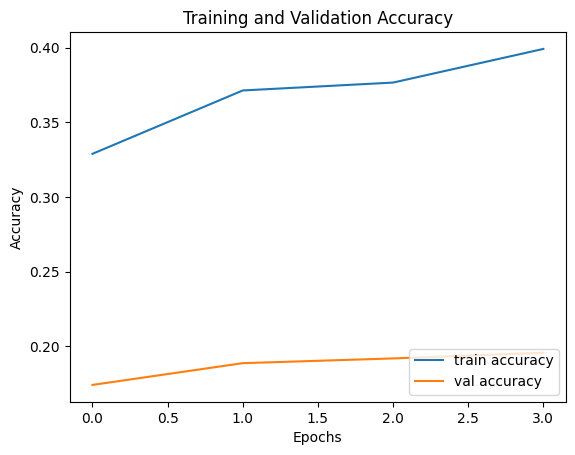

In [83]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.plot(history_resnet152.history['accuracy'], label='train accuracy')
plt.plot(history_resnet152.history['val_accuracy'], label = 'val accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.show()


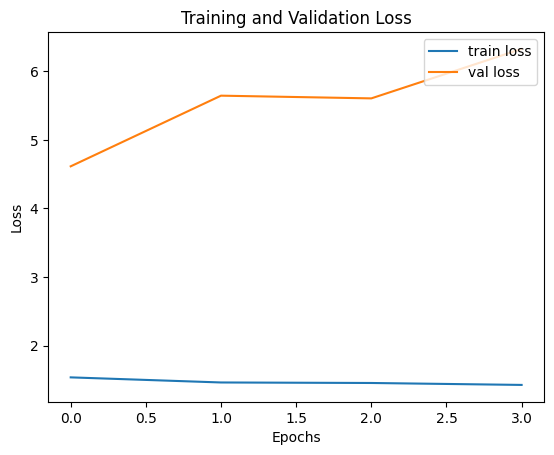

In [84]:
# Plot training and validation loss
plt.plot(history_resnet152.history['loss'], label='train loss')
plt.plot(history_resnet152.history['val_loss'], label = 'val loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


50/50 ━━━━━━━━━━━━━━━━━━━━ 27s 375ms/step


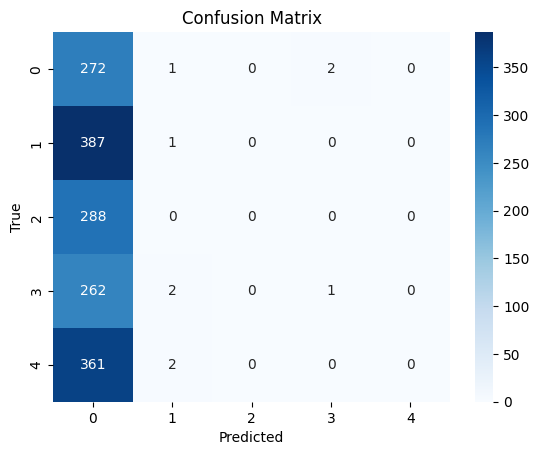

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Make predictions on test data
y_pred = resnet_model.predict(test_flower_gen)
y_pred_classes = np.argmax(y_pred, axis=1)

# Compute confusion matrix
cm = confusion_matrix(test_flower_gen.labels, y_pred_classes)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


In [86]:
from sklearn.metrics import classification_report

# Generate classification report
print(classification_report(test_flower_gen.labels, y_pred_classes))


              precision    recall  f1-score   support

           0       0.17      0.99      0.29       275
           1       0.17      0.00      0.01       388
           2       0.00      0.00      0.00       288
           3       0.33      0.00      0.01       265
           4       0.00      0.00      0.00       363

    accuracy                           0.17      1579
   macro avg       0.13      0.20      0.06      1579
weighted avg       0.13      0.17      0.05      1579



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


50/50 ━━━━━━━━━━━━━━━━━━━━ 10s 205ms/step


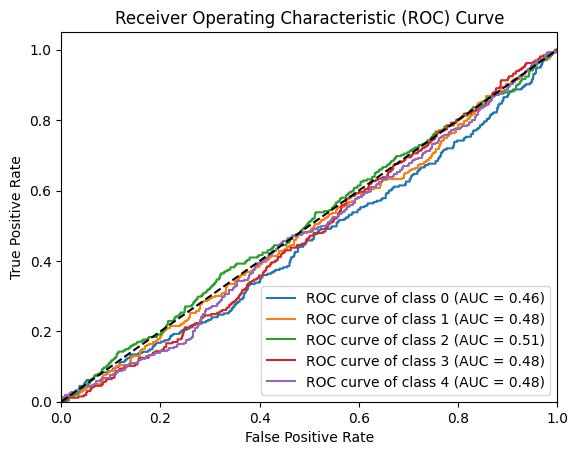

In [87]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

num_classes = 5

# Binarize the output
y_true = label_binarize(test_flower_gen.labels, classes=[0, 1, 2, 3, 4])
y_score = resnet_model.predict(test_flower_gen)

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curve for each class
plt.figure()
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label=f'ROC curve of class {i} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
